***
# Загрузка датасета


In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML
import ipywidgets as widgets

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Показать код", True: "Скрыть код"}
def toggle_code(state):
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))
def button_action(value):
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]
state = False
toggle_code(state)
button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")
display(button)

ToggleButton(value=False, description='Показать код')

In [5]:
import os
import pandas as pd
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df_train = pd.read_csv("/kaggle/input/alfamipt-2023-atm-cash-prediction/train.csv")
df_test = pd.read_csv("/kaggle/input/alfamipt-2023-atm-cash-prediction/test.csv")

df_train = df_train.sort_values(by = ['atm_id', 'value_day'])
df_test = df_test.sort_values(by = ['atm_id', 'value_day'])

df_train.rename(columns = {'value_day': 'ds', 'target': 'y'}, inplace=True)
df_test.rename(columns = {'value_day': 'ds', 'target': 'y'}, inplace=True)

df_train['ds'] = pd.to_datetime(df_train['ds'])
df_test['ds'] = pd.to_datetime(df_test['ds'])

print("Банкоматов в выборках", df_train['atm_id'].nunique(), df_test['atm_id'].nunique())

/kaggle/input/alfamipt-2023-atm-cash-prediction/sample_submition.csv
/kaggle/input/alfamipt-2023-atm-cash-prediction/train.csv
/kaggle/input/alfamipt-2023-atm-cash-prediction/test.csv
/kaggle/input/baseline/submition.csv
/kaggle/input/baseline/__results__.html
/kaggle/input/baseline/__notebook__.ipynb
/kaggle/input/baseline/__output__.json
/kaggle/input/baseline/custom.css
Банкоматов в выборках 650 120


In [4]:
df_train

,atm_id,ds,y
326022,0060b84f508a7b0ac85afbc5c42f54bb,2021-01-31,761600.0
147356,0060b84f508a7b0ac85afbc5c42f54bb,2021-02-01,1207100.0
276530,0060b84f508a7b0ac85afbc5c42f54bb,2021-02-02,1829000.0
248884,0060b84f508a7b0ac85afbc5c42f54bb,2021-02-03,1112000.0
330843,0060b84f508a7b0ac85afbc5c42f54bb,2021-02-04,1542000.0
...,...,...,...
36090,ff5fbd5869e6b8f230bbbfb75ccb664c,2021-07-23,610000.0
206320,ff5fbd5869e6b8f230bbbfb75ccb664c,2021-07-24,1204000.0
317659,ff5fbd5869e6b8f230bbbfb75ccb664c,2021-07-26,323000.0
288403,ff5fbd5869e6b8f230bbbfb75ccb664c,2021-07-27,2111000.0


In [6]:
df_train = df_train.pivot(index='ds', columns='atm_id', values='y')
df_train

atm_id,0060b84f508a7b0ac85afbc5c42f54bb,0131f1061928d9ff9cee1f43ba767d27,01594f16b4c40588017a48407b38cb21,022cdb01b498a7519cd0f64b5881c7d6,0398bd142c4c2084a55d9c049bcf9297,03ce04661868ba22b50631b56a403575,041920edb14378657c0e1f88686b85ea,04659f2d55aaa352addb48aee767902c,05645fa3ba48b037f3fefd87693d02b2,059ece836ff346bebf15d376a303ad13,...,fba98b22781e5b97aca31a9b12658b30,fbff7e9fa8155018089044708b1856d4,fc4e600114522feacdf11aec9c36452a,fd29ff92dc367dec6d1549182dc1e966,fe300e697145905038a62aa6212cec8a,fe7adf9b8473b89ff314c4b457a481b5,ff19ad566c5335052b2001f3606375da,ff39da3555ef838636379bc5f7ce7bfa,ff5566467ecc1dada906c77b2bc0e47b,ff5fbd5869e6b8f230bbbfb75ccb664c
ds,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,299200.0,31200.0,NaN,1508100.0,1547000.0,541000.0,1020600.0,588600.0,...,NaN,410400.0,385900.0,2418900.0,238000.0,NaN,667900.0,NaN,NaN,NaN
2020-01-02,NaN,NaN,157800.0,444100.0,NaN,1040000.0,640000.0,807000.0,421000.0,306300.0,...,NaN,1081900.0,720000.0,2619500.0,509300.0,NaN,1201000.0,NaN,NaN,NaN
2020-01-03,NaN,NaN,843000.0,468400.0,NaN,1309400.0,1117000.0,2193600.0,1622300.0,282000.0,...,NaN,4674500.0,810600.0,1775900.0,1050500.0,NaN,981300.0,NaN,NaN,NaN
2020-01-04,NaN,NaN,591300.0,961700.0,NaN,1254600.0,1627000.0,915000.0,2326000.0,1353900.0,...,NaN,1730800.0,519500.0,2438700.0,802000.0,NaN,1390600.0,NaN,NaN,NaN
2020-01-05,NaN,NaN,219900.0,454700.0,NaN,1782900.0,923000.0,970300.0,840000.0,405500.0,...,NaN,453200.0,964400.0,2292900.0,1695600.0,NaN,728500.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,3588100.0,4659000.0,8300500.0,1596900.0,3715000.0,5328500.0,3936000.0,5387000.0,NaN,6597500.0,...,5496100.0,9578900.0,6133400.0,6735100.0,5230300.0,4212400.0,3022300.0,11077700.0,4445900.0,NaN
2021-12-28,8736500.0,2436000.0,8231900.0,4147100.0,6848000.0,3080500.0,12129600.0,9979500.0,NaN,8903000.0,...,4423800.0,6312700.0,6610700.0,6875600.0,12266400.0,8824700.0,2136800.0,12068300.0,4785500.0,NaN
2021-12-29,5707400.0,6762000.0,4464300.0,4030400.0,5577000.0,5695400.0,8888000.0,10620000.0,NaN,10797900.0,...,8853500.0,11352200.0,8651800.0,239200.0,4623400.0,4276600.0,1630500.0,10102000.0,5148600.0,NaN


### Посмотрим, как выглядят ряды, которые нужно будет спрогнозировать

In [6]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()
for atm in df_train.columns[0:10]:
    fig.add_trace(go.Scatter(x=df_train.index, y=df_train[atm], name = atm))
    fig.update_xaxes(
        tickformat="%b\n%Y")
fig.update_xaxes(rangeslider_visible=True, 
                 title_text = "Дата", 
                 title_standoff = 25, 
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1м", step="month", stepmode="backward"),
                         dict(count=6, label="6м", step="month", stepmode="backward"),
                         dict(count=1, label="1г", step="year", stepmode="backward"),
                         dict(label="все", step="all")])))
fig.update_yaxes(title_text = "Продажи", title_standoff = 25)
fig.update_layout(title = "Набор временных рядов")
fig.show()

***
# 1. EDA
В этом блоке предлагается изучить исходные данные и ответить на вопросы о них.

## 1.1. Сезонности и тренды
<ol>
    <li>Есть ли в данных явно выраженные тренды?</li>
    <li>Есть ли в данных сезонность? Если есть, то какая? Почему это может быть важно?</li>
</ol>

Для проверки временных рядов на стационарность - следоватлеьно отсутствие сезонности, проведём для каждого временного ряда тест Дики-Фулера и визуализируем: 


* Если p-val < 0.01 - <font color='green'>зелёным</font>


* Если p-val < 0.05 - <font color='orange'>жёлтым</font>


* Если p-val > 0.05, но ADF < Critical val. - <font color='purple'>фиолетовым</font>


* Если p-val > 0.05 - <font color='red'>красным</font>

In [ ]:
# докажем отсутствие тренда првоеркой на стационарность при помощи теста Дики-Фулера
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns   
import math

i,j=0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(df_train.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))

for col in df_train.columns:
    result = adfuller(df_train[col])
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']
    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    axs[i][j].plot(df_train.index, df_train[col], color=linecolor)
    axs[i][j].set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    axs[i][j].set_ylabel(ylabel=col, fontsize=14)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

plt.tight_layout()
plt.show()


**На 5% уровне значимости можно сказать, что все временные ряды стационарны согласно статистике Дики-Фулера. Нет ни одного красного графика. Это значит, что в данных нет выраженного тренда.**

***
Проведём также анализ Фурье для выявления сезонностей в данных. 
Видно, что анализ не выделил каких-то больших сезонностей при таком подходе, обращая внимания только на малочастотные гармоники.

In [ ]:
# для определения сезонности мы можем провести гармонический анализ с преобразованием Фурье
import heapq
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns   
import math
import numpy as np
lenth_prod = len(df_train.index)
ts_ft=np.abs(np.fft.rfft(df_train['product_10']))
ts_freq = np.fft.rfftfreq(lenth_prod)*lenth_prod
ts = pd.DataFrame(ts_ft, columns = ['ts_ft'])
ts_freq = np.fft.rfftfreq(lenth_prod)
# Посмотрим на топ 10 самых выделяющихся гармоник для каждой переменной
fig = go.Figure()
for col in df_train.columns:
    ts_ft=np.abs(np.fft.rfft(df_train[col]))
    ts_freq = np.fft.rfftfreq(lenth_prod)*lenth_prod
    ts = pd.DataFrame(ts_ft, columns = [col])
    fig.add_trace(go.Scatter(x=ts.index, y=ts[col], name = col))
fig.update_xaxes(rangeslider_visible=True, 
                 title_text = "Длина ряда", 
                 title_standoff = 25,)
fig.update_yaxes(title_text = "Частота гармоник", title_standoff = 25)
fig.update_layout(title = "Набор гармоник временных рядов")
fig.show()

# можно заметить, что у рядов выделяются частоты на 3-6 днях, меньше на 12-21 днях и последние всплески на 40-50 дней, 
#что отражает еженедельную, полумесячную и ежемесячную динамики

Посмотрим на графики автокорреляций (ACF) для каждого временного ряда в размерности до 600 дней, т.к. очевидно, что больше, чем ежегодной сезонности в данных из 3-4 лет нет. К тому же визуально это видно.


Тем не менее стоит обратить внимание на максимизацию второй и третей волны на графиках. Если 3 волна превосходит по модулю значимости вторую волну, значит в данных есть четко-выраженная ежегодная сезонность.

In [ ]:
# кроме того, для определения сезонности помогут графики автокорреляции 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
i,j=0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(df_train.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))

for col in df_train.columns:
    plot_acf(df_train[col], ax=axs[i][j], lags=600)
    axs[i][j].set_ylabel(ylabel=col, fontsize=14)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

plt.show()

# в данном случае мы видим, что в рядах есть значимые автокорреляции на разных уровнях: Например product_26
# обладает ежегодной сезонностью, а product_27 полугодовой
# на основании этих данных продукты можно распределить на кластеры, для которых можно обучить отдельные модели

Основываясь на данных автокорреляций мы можем подразделить времянные ряды каждого продукта по категориям:


* 1/2 года - максимизация на второй волне (6 продуктов)


* 3/4 года - максимизация в 3 квартале (2 продукта)


* 1 year - максимизация на 3 волне (31 продукта)

In [ ]:
# мы могли бы записать некоторые условные классы для классификации лагов
lag_classes = [
    {
        "name": "1/2 year",
        "min": 120,
        "max": 200
    },
    {
        "name": "3/4 year",
        "min": 200,
        "max": 300
    },
    {
        "name": "1 year",
        "min": 300,
        "max": 400
    },
    {
        "name": "1/4 year",
        "min": 80,
        "max": 120
    }
]
# Чтобы далее щаписать функцию, классифицирующую временные ряды в зависимости от того, на каком лаге максимизируется их автокорреляция
def classify_columns_by_autocorrelation(df, lag_classes):
    autocorrelation = {}
    class_dataframes = {class_["name"]: pd.DataFrame() for class_ in lag_classes}
    for column in df.columns:
        autocorr = acf(df[column], nlags=500) # ограничим количество лагов разумным пределом
        max_autocorr = max(autocorr[80:]) # не будем использовать первые 80 лагов, поскольку они не интформативны
        max_lag = np.argmax(autocorr[80:])+80 
        for lag_class in lag_classes:
            if max_lag >= lag_class["min"] and max_lag < lag_class["max"]:
                autocorrelation[column] = {"autocorrelation": max_autocorr, "lag": max_lag, "class": lag_class["name"]}
                class_dataframes[lag_class["name"]][column] = df[column] # и запишем каждый продукт в новые датафрейм в словаре
                break
    return class_dataframes



df = df_train
class_df = classify_columns_by_autocorrelation(df, lag_classes)
class_df

In [ ]:
# это бы очень пригодилось, если бы мы вручную строили проноз для отдельных типов рядов
# однако мы можем просто передать в рнаш датафрейм значения автокорреляций на каждом лаге для каждой переменной, а затем отдать
# эти данные модели, которая сама будет искать закономерности
def add_autocorr_columns(df, cols):
    for col in cols:
        autocorr_col = col + '_autocorr'
        df[autocorr_col] = acf(df[col], nlags=df.shape[0]-1)
        
cols_to_autocorr = df_train.columns
add_autocorr_columns(df, cols_to_autocorr)
df.shape

Эти данные можно использовать для построения более точных моделей, разделяя временные ряды на группы перед моделирование и включая наборы автокорреляций или некоторые собственные ряды относительно друго друга с временным лагом, кратным сезонности.
Это может привести к понастоящему превосходному моделированию. 
Но это трудоёмко, поэтому на данный момент достаточно будет данных одного ряда и промоакций.

## 1.2. Масштаб
<ol>
    <li> Какой масштаб у рядов? </li>
    <li> Какой разброс значений внутри каждого ряда? </li>
    <li> Может ли это как-то помешать при прогнозировании? </li>
</ol>

Для просмотра более точных данных о переменных, оценке нормальности распределения и визуализации распределений, посмотрим на интерактивный отчёт, созданный в виде HTML файла. Прикреплён в репозитории.

In [ ]:
# создадим html отчёт о данных для удобства их просмотра. В отчёте представлены распределения, основные статистики, корреляции
!jupyter nbextension enable --py widgetsnbextension
from pandas_profiling import ProfileReport
report = ProfileReport(df_train, title="Обзор данных", sort="ascending")
report.to_file("ts_report.html")
report # можно заметить, что многие переменные коррелируют друг с другом, как в положительном направлении, так и в отрицательном
# кроме того, не все переменные распределены приближенно по нормальному акону распределения, что говорит о том, что не ко всем из них подойдут стандартные параметрические оценки и нормы стандартизации

Можно говорить о том, что не все временные ряды обладают нормальным распределением. некоторые ряды смещены влево. Однако, допуская большой размер выборки, мы условно примем распределение переменных близко к нормальному. Хотя, конечно, в реальных продуктах необходимо будет скорее снова разбить продукты на группы и приводить распределение к нормальному средсвами логарифмирования, например. 

In [ ]:
import gc
import sys
import warnings
from joblib import Parallel, delayed
from pathlib import Path

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import (CalendarFourier,
                                           CalendarSeasonality,
                                           CalendarTimeTrend,
                                           DeterministicProcess)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import heapq
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns   
import math

In [ ]:
# построим периодограммы для каждого продукта, чтобы оценить масштаб сезонностей во временных рядах
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="forestgreen")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 12, 52])
    ax.set_xticklabels(
        [
            "Годовой",
            "Полугодовой",
            "Квартальный",
            "Месячный",
            "Недельный",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Спектральная плотность")
    return ax

i,j=0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(df_train.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))

for col in df_train.columns:
    plot_periodogram(df_train[col], ax=axs[i][j])
    axs[i][j].set_title("Периодограмма "+col)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
# как можно заметить, и как ранее показал график автокорреляций, большинство рядов обладают годовой и полугодовой сезонностью 
# так же есть и месячная сезонность
# тем не менее, необходимо сделать прогноз на 24 дня, поэтому группировать ряды по сезоным мы не будем

Здесь мы, грубо говоря, использовали тот же подход к классификации, что использовали ранее с acf. 
На основе данных периодограмм можно выделить, что полугодовой цикл больше выделяется у продукта 39, 35, 34, 32, 31, 27, 26, 24. Годовой цикл - в основном у всех остальных. В данном случае мы не выделяли 3/4 года. Можно сказать, что группы полностью идентичны. Таким образом, выясненная закономерность устойчива.
Если бы мы подбирали модель временных рядов, мы бы могули учесть значения максимизирующих лагов для каждой группы или каждого временного ряда.

## 1.3. Аномалии
<ol>
    <li>Есть ли в рядах выбросы?</li>
    <li>Как выбросы могут повлиять на прогнозирование?</li>
    <li>Что с ними можно сделать?</li>
</ol>

Для визуализации выбросов мы визуализировали z-оценки переменных и выбрали для каждой допустимый коридор. Красные точки вне этого коридора инициируются выбросами.

  0%|          | 0/10 [00:00<?, ?it/s]

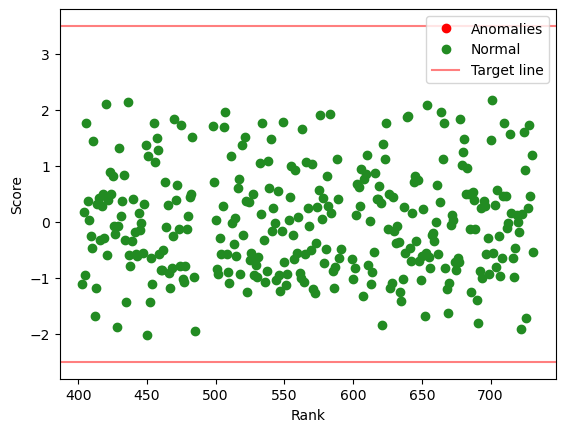

 10%|█         | 1/10 [00:00<00:01,  4.78it/s]

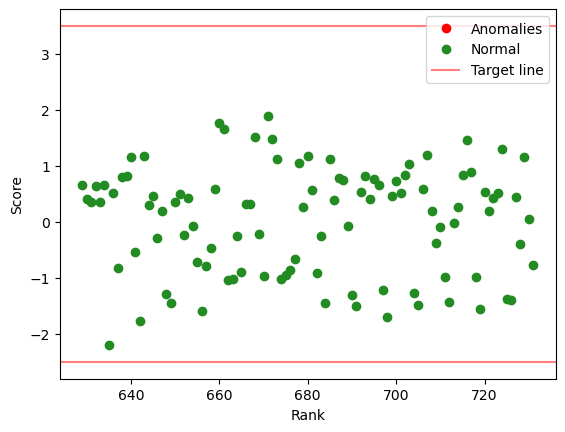

 20%|██        | 2/10 [00:00<00:01,  5.51it/s]

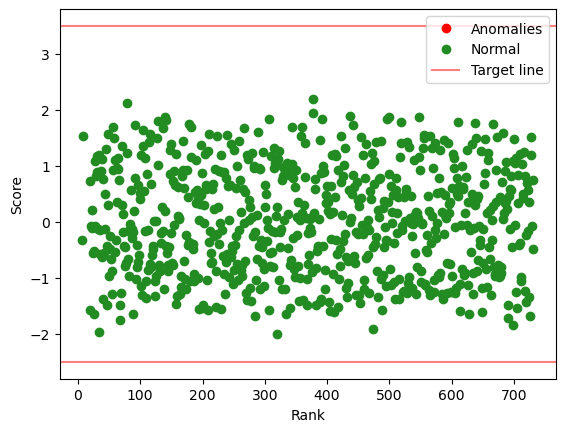

 30%|███       | 3/10 [00:00<00:01,  5.46it/s]

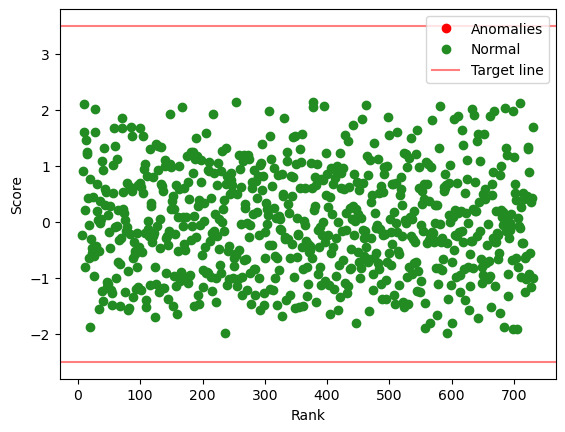

 40%|████      | 4/10 [00:00<00:01,  5.21it/s]

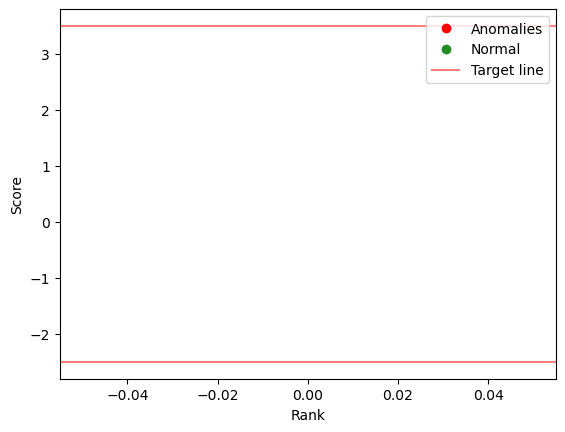

 50%|█████     | 5/10 [00:00<00:00,  5.78it/s]

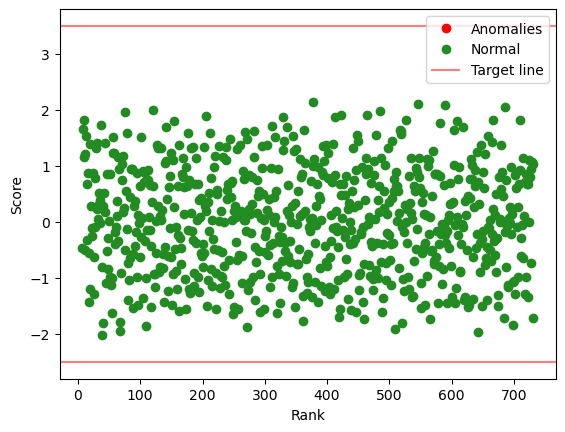

 60%|██████    | 6/10 [00:01<00:00,  5.99it/s]

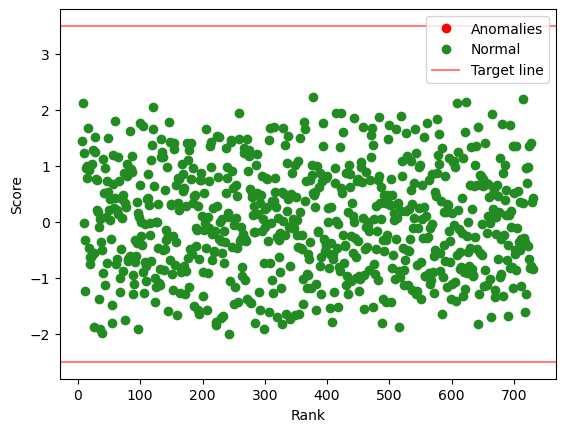

 70%|███████   | 7/10 [00:01<00:00,  6.01it/s]

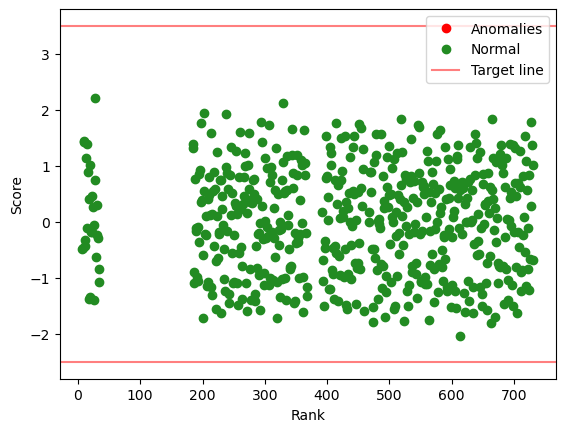

 80%|████████  | 8/10 [00:01<00:00,  6.04it/s]

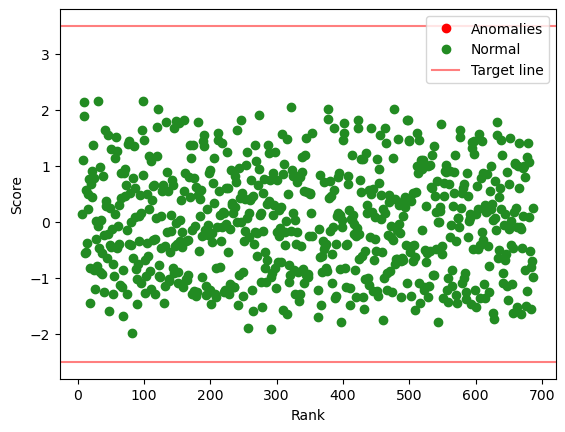

 90%|█████████ | 9/10 [00:01<00:00,  6.15it/s]

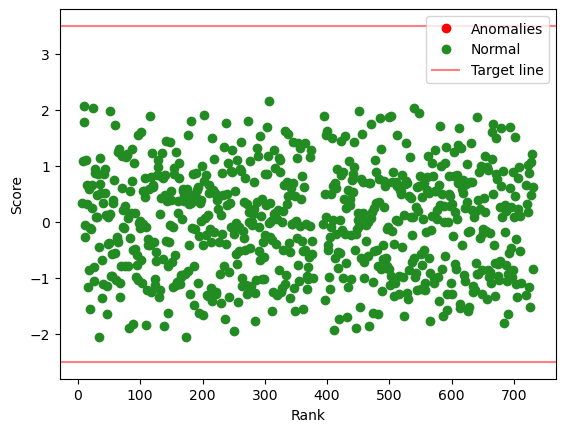

100%|██████████| 10/10 [00:01<00:00,  5.77it/s]


<Figure size 640x480 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt
import math

from tqdm import tqdm
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

# Ignore FutureWarnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

def modify_zscore(data, window=7):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    zscore = (data - rolling_mean) / rolling_std
    return zscore

# Visualize outliers for each series
def plot_anomaly(score_data, threshold, threshold_2):
    ranks = np.linspace(1, len(score_data), len(score_data))
    ranks = pd.DataFrame(ranks, index=score_data.index)
    mask_outliers = (score_data > threshold)
    mask_outliers_2 = (score_data < threshold_2)
    plt.plot(ranks[mask_outliers], score_data[mask_outliers], 'o', color='red', label='Anomalies')
    plt.plot(ranks[~mask_outliers & ~mask_outliers_2], score_data[~mask_outliers & ~mask_outliers_2], 'o', color='forestgreen', label='Normal')
    plt.plot(ranks[mask_outliers_2], score_data[mask_outliers_2], 'o', color='red')
    plt.axhline(threshold, color='red', label='Target line', alpha=0.5)
    plt.axhline(threshold_2, color='red', alpha=0.5)
    plt.xlabel('Rank')
    plt.ylabel('Score')
    plt.legend(loc='upper right')
    plt.show()

# Loop over the columns
for col in tqdm(df_train.iloc[:,:10].columns, total=len(df_train.iloc[:,:10].columns)):
    plot_anomaly(modify_zscore(df_train[col]), 3.5, threshold_2=-2.5)

plt.tight_layout()
plt.show()


Обработка выбросов и пропусков

In [9]:
from tqdm.notebook import tqdm
def replace_outliers(df, col, z_threshold):
    q90 = df[col].quantile(0.9)
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    df.loc[abs(z_scores) > z_threshold, col] = q90
    return df

for col in tqdm(df_train.columns, total=len(df_train.columns)):
    df_train = replace_outliers(df_train, col, 3)

  0%|          | 0/650 [00:00<?, ?it/s]

In [10]:
def replace_missing_values(df, col):
    start_date = df[col].first_valid_index()
    end_date = df[col].last_valid_index()
    df.loc[start_date:end_date, col] = df.loc[start_date:end_date, col].interpolate(method='linear', limit_direction='both')
    return df

for col in tqdm(df_train.columns, total=len(df_train.columns)):
    df_train = replace_missing_values(df_train, col)

  0%|          | 0/650 [00:00<?, ?it/s]

In [66]:
fig = go.Figure()
for atm in df_train.columns[0:10]:
    fig.add_trace(go.Scatter(x=df_train.index, y=df_train[atm], name = atm))
    fig.update_xaxes(
        tickformat="%b\n%Y")
fig.update_xaxes(rangeslider_visible=True, 
                 title_text = "Дата", 
                 title_standoff = 25, 
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1м", step="month", stepmode="backward"),
                         dict(count=6, label="6м", step="month", stepmode="backward"),
                         dict(count=1, label="1г", step="year", stepmode="backward"),
                         dict(label="все", step="all")])))
fig.update_yaxes(title_text = "Продажи", title_standoff = 25)
fig.update_layout(title = "Набор временных рядов")
fig.show()

## 1.4. Взаимосвязь рядов
<ol>
    <li>Коррелируют ли ряды между собой?</li>
    <li>Можно ли как-то это использовать? Если да, как? Если нет, почему?</li>
</ol>

### Как мы выяснили ранее во время EDA, определенные ряды коррелируют между собой. 

Помимо простой парной корреляции, существует ещё такой тест, как тест рядов на причинность: 


* Тест Гренджера на причинность


* Тест Йохансена на коинтеграцию

### Тест Гренджера на причинность
Показывает, может ли один ряд быть причиной другого. По нижней оси соответственно показано, какие переменные являются причиной, а по вертикальной - какие последсвием в нижнем треугольнике. И наоборот в верхнем треугольнике.

In [ ]:
# помимо корреляции мы можем оценить, воздействуют ли определенные ряды в прошлом на другие ряды в будущем
# в этом нам поможет тест Гренджера на причинность и Йохансена на коллинеарность
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=25
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
# функция записывает p-уровень значимости теста Гренджера на причинность. Иными словами ряды с малыми значениями (до 0,05)
# могут быть причинами других по принципе столбец_x причина строки_y.
import plotly.express as px

fig = px.imshow(grangers_causation_matrix(df_train.iloc[:, 1:30], variables = df_train.iloc[:, 1:30].columns), aspect="auto")
fig.show()

### Тест Йохансана на коинтеграцию 
Тест показывает, какие переменные могут быть коинтегрированы с другими на определённом уровне значимости и соответственно могу действитлеьно знаимо быть причинами других переменных. Здесь значения True напротив продукта значат ,что они действительно могут быть причинами других по Йохансену. В результате, совместив эти 2 теста, мы можем получить комбинации переменных, которые являются причинами друг друга.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05):
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)
    print('       Тест Йохансена на коинтеграцию  \n', '--'*20, '\n', 'Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_train) # можно считать достоверными оценки причинности по Гренджеру для тех переменных
# для которых оценки теста Йохансена = True

Здесь мы просто визуализирвоали эти ряды

In [ ]:
fig = go.Figure()
for products in df_train.columns[19:28]:
    fig.add_trace(go.Scatter(x=df_train.index, y=df_train[products], name = products))
    fig.update_xaxes(
        tickformat="%b\n%Y")
fig.update_xaxes(rangeslider_visible=True, 
                 title_text = "Дата", 
                 title_standoff = 25, 
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1м", step="month", stepmode="backward"),
                         dict(count=6, label="6м", step="month", stepmode="backward"),
                         dict(count=1, label="1г", step="year", stepmode="backward"),
                         dict(label="все", step="all")])))
fig.update_yaxes(title_text = "Продажи", title_standoff = 25)
fig.update_layout(title = "Набор причинных временных рядов")
fig.show()

И на последок посмотрим на тепловую карту многомерной автокорреляции переменных

In [ ]:

def estimate_multivariate_autocorrelation(df):
    n_cols = df.shape[1]
    autocorrelation_matrix = np.zeros((n_cols, n_cols))
    for i in range(n_cols):
        for j in range(n_cols):
            autocorrelation_matrix[i, j] = df[df.columns[i]].autocorr(lag=j)
    return autocorrelation_matrix
autocorrelation_matrix = estimate_multivariate_autocorrelation(df_train)
def create_autocorrelation_heatmap(autocorrelation_matrix, columns):
    data = go.Heatmap(z=autocorrelation_matrix,
                      x=columns,
                      y=columns,
                      hoverongaps = False,
                      colorbar=dict(title='Корреляционный коэффициент'))
    layout = go.Layout(title='Многомерная автокорреляция')
    fig = go.Figure(data=data, layout=layout)
    fig.show()

create_autocorrelation_heatmap(autocorrelation_matrix, df_train.columns)

Таким образом, многие временные ряды коррелируют с другими. Однако, очевидно, что эта корреляция обусловлена сезонностью продаж этих товаров. В ручной настройке мы могли бы разделить уже известные нам группы в словаре временных рядов из раздела " ", еще на несколько групп, по значениям корреляции между ними: от слабой до сильной. Тем не менее при моделировании благодаря нейронным сетям, мы можем оставить этот момент. И нам следует оставить этот момент, поскольку всё-равно мы не знаем, сколько продукта той или иной категории будет продано в момент n и n+1, а только в момент n-1.

## 1.5. Акции
<ol>
    <li>Что из себя представляет датасет с акциями?</li>
    <li>Как часто происходит каждая акция?</li>
    <li>Рекламная акция для какого-то продукта влияет на его продажи. Может ли она повлиять на продажи других продуктов?</li>
    <li>Есть ли акции, которые пересекаются по времени? Могут ли сразу несколько акций повлиять на один продукт?</li>
</ol>

Информация о датафрейме

In [ ]:
!pip install pycausalimpact

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import causalimpact
df_promotions.info() # информация о наборе данных промоакций

На такой "частотной" визуализации в виде ребящего телевизора можно наглядно увидеть, как акции распределены вов ремени. И что они действительно сильно переплетены, а какие-то длятся действительно долго. 

In [ ]:
# посмотрим на частоту акций во времени
df_promotions.reset_index(inplace=True) 
df_promo = df_promotions.melt(id_vars=['index'],
             var_name = 'name',
             value_name = 'promo') # преобразуем широкие данные в длинные

fig = px.scatter(df_promo, x="index", y="name", color="promo")

fig.update_xaxes(rangeslider_visible=True, 
                 title_text = "Дата", 
                 title_standoff = 25, 
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1м", step="month", stepmode="backward"),
                         dict(count=6, label="6м", step="month", stepmode="backward"),
                         dict(count=1, label="1г", step="year", stepmode="backward"),
                         dict(label="все", step="all")])))
fig.update_layout(
    autosize=False,
    width=800,
    height=800)
fig.show() 
# как можно заметить, есть множество пересечений, частота промоакций различная, они пересекаются
# отсюда можно сделать вывод, что акции могут воздействовать на несколько продуктов сразу 
# кроме того, фундаментально, не зная природу акций, оценить их воздействие на явно сезонные переменные будет затруднительно, а большого эффекта они не окажут

Взаимосвязь переменных промоакций и продуктов продемонстрируем на корреляционной диаграмме.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
def corr(df1, df2):
    n = len(df1)
    v1, v2 = df1.values, df2.values
    sums = np.multiply.outer(v2.sum(0), v1.sum(0))
    stds = np.multiply.outer(v2.std(0), v1.std(0))
    return pd.DataFrame((v2.T.dot(v1) - sums / n) / stds / n,
                        df2.columns, df1.columns)

reshapepromo = df_promotions[:-24]
reshapepromo = reshapepromo.iloc[:, 1:1001]
df_concat_corr = corr(df_train, reshapepromo)
au_corr = df_concat_corr.unstack()
filtercorr = au_corr[((au_corr >= .6) | (au_corr <= -.6)) & (au_corr !=1.000)]
au_corr = filtercorr.unstack(level=0)
fig = px.imshow(au_corr, aspect="auto")
fig.update_layout(font=dict(size=8))
print("Топ корреляций переменных")
fig.show()

Тоже самое можно сделать отдельно для всех промоакций.

In [ ]:
def get_redundant_pairs(df):
    '''Без дублирования'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, max, min):
    '''Получим топ коррелируемых переменных'''
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    filtercorr = au_corr[((au_corr >= max) & (au_corr <= min)) | ((au_corr <= - max ) & (au_corr >= - min)) & (au_corr !=1.000)]
    au_corr = filtercorr.unstack(level=0)
    fig = px.imshow(au_corr, aspect="auto")
    fig.update_layout(font=dict(size=8))
    fig.show()

print("Топ очень высоких корреляций переменных")
get_top_abs_correlations(reshapepromo, 0.9, 0.999999)
print("Топ высоких корреляций переменных")
get_top_abs_correlations(reshapepromo, 0.7, 0.899999)
print("Топ средних корреляций переменных")
get_top_abs_correlations(reshapepromo, 0.5, 0.699999)

Таким образом, можно понять, что огромное количество промоакций связанно друг с другом и лишь некоторые влияют на продукты.
Посмотрим на таблицу промоакций.

In [ ]:
df_promotions.head(5)

Таблица не очень наглядная, но в ней видно, что из себя представляют данные - 0, когда акций нет, и 1 - когда они есть. Мы можем посчитать, какова длительность каждой акции в промежуток времени её присутствия. Запишем новый датафрейм и визуализируем ниже.

In [ ]:
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
df_promo = df_promotions
def calculate_promotion_duration(df, promotion_cols):
    duration_cols = [col + '_duration' for col in promotion_cols]
    df[duration_cols] = 0
    for col, duration_col in zip(promotion_cols, duration_cols):
        promotion = df[col].to_numpy()
        start = -1
        for i in range(len(promotion)):
            if start == -1:
                if promotion[i] == 1:
                    start = i
            else:
                if promotion[i] == 0:
                    end = i
                    duration = end - start
                    df.loc[start:end-1, duration_col] = duration
                    start = -1
        if start != -1:
            end = len(promotion)
            duration = end - start
            df.loc[start:, duration_col] = duration
    return df

promotion_cols = list(df_promo.columns)
calculate_promotion_duration(df_promo, promotion_cols)

In [ ]:
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
import plotly.express as px
fig = px.line(df_promo.iloc[:, 1002:2002], x=df_promo.index, y=list(df_promo.iloc[:, 1002:2002].columns), labels={'x':'Date','y':'Duration (days)'}, title="Promotion duration over time")
fig.show()

На таком графике можно даже выделить разные частоты промоакций. Например акции 58 и 978 длятся около 1000 дней. 
акций, которые длятся более 400 дней меньше, их можно посмотреть на глаз. 
И большая плотность акций начинается там, где из длительность меньше 400 дней. Здесь уже поможет интерактивность plotly. 
Тем не менее, разбираться вручную со всем этим разнообразием будет ужасно сложно, долго и непродуктивно. Однако, все новые переменные, которые мы уже собрали, можно "скормить" нейросети для лучших предсказаний.

## 1.6. Ваш ход
Может быть, есть еще что-то интересное, чего мы не заметили? :)

Уже выложил всё выше :)


***
# 2. Прогнозирование
В этом блоке предлагается построить прогноз на указанный промежуток времени и ответить на вопросы о метриках и валидации результатов.

<i>Возможно, в этом блоке не получится разбить код на предложенные части; в таком случае следует оставить максимально подробный комментарий к происходящему. </i>

In [13]:
HORIZON = 14 # горизонт прогнозирования

## 2.1. Пайплайн прогнозирования
### 2.1.1. Подготовка данных
<ol>
    <li>Нужно ли как-то предобрабатывать ряды из датасета?</li>
    <li>Какие признаки можно выделить из данных?</li>
    <li>Какие признаки можно извлечь из индекса timestamp?</li>
    <li>Как использовать данные об акциях?</li>
    <li>*Есть ли среди выделенных признаков categorical признаки? Если есть, как с ними работать?</li>
</ol>

### 2.1.2. Модель
Какие модели прогнозирования могут помочь в нашей задаче? В чем их особенности, плюсы и минусы?

За основу возьмём датафрейм промоакций, добавленный их длительностью на предыдущем шаге. Но исключим последние 24 наблюдения для тренировки нейронной сети на известных данных.

In [11]:
import numpy as np
import pandas as pd
import math
import h5py
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr
from time import sleep
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler


# Libraries required by FeatureSelector()
import lightgbm as lgb
import gc
from itertools import chain
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import copy
from matplotlib.dates import (DateFormatter, WeekdayLocator, DayLocator, MONDAY)

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, TensorBoard
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape, LSTM, GRU
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU, PReLU, GlobalAveragePooling1D
from keras import regularizers
from keras import backend as K

Далее мы добавим в этот датафрейм: 


* День в году - рассчитанный из индекса. Так нейронная сеть поймёт ежегодную сезонность.


Отдельно в функции


* Добавим в обучающие данные временной ряд непосредственно продукта, для которого строится нейросеть, сдвинутую на 24 шага вперёд.
Таким образом мы сможем затем предсказать данные на 24 шага вперёд, согласно заданию.



* Удалим первые 24 пустых наблюдения.



И построим модель

In [14]:
df_shifted = df_train.shift(HORIZON)
df_shifted

atm_id,0060b84f508a7b0ac85afbc5c42f54bb,0131f1061928d9ff9cee1f43ba767d27,01594f16b4c40588017a48407b38cb21,022cdb01b498a7519cd0f64b5881c7d6,0398bd142c4c2084a55d9c049bcf9297,03ce04661868ba22b50631b56a403575,041920edb14378657c0e1f88686b85ea,04659f2d55aaa352addb48aee767902c,05645fa3ba48b037f3fefd87693d02b2,059ece836ff346bebf15d376a303ad13,...,fba98b22781e5b97aca31a9b12658b30,fbff7e9fa8155018089044708b1856d4,fc4e600114522feacdf11aec9c36452a,fd29ff92dc367dec6d1549182dc1e966,fe300e697145905038a62aa6212cec8a,fe7adf9b8473b89ff314c4b457a481b5,ff19ad566c5335052b2001f3606375da,ff39da3555ef838636379bc5f7ce7bfa,ff5566467ecc1dada906c77b2bc0e47b,ff5fbd5869e6b8f230bbbfb75ccb664c
ds,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,3091500.0,3682000.0,5958000.0,2575000.0,707000.0,3383600.0,5315000.0,3030000.0,NaN,6102600.0,...,4116100.0,3647200.0,3735200.0,4755200.0,7624300.0,2250500.0,3002600.0,9666800.0,4249300.0,NaN
2021-12-28,3723930.0,3493000.0,4633500.0,4928000.0,674000.0,3061200.0,10320000.0,4257000.0,NaN,7133300.0,...,4239100.0,5782800.0,4422900.0,4205000.0,7108500.0,4511700.0,2368000.0,7146200.0,4824800.0,NaN
2021-12-29,4248500.0,4091000.0,5133700.0,2971400.0,1393000.0,5009000.0,6902000.0,7372000.0,NaN,7249800.0,...,2649100.0,7499700.0,8828700.0,2936400.0,7325100.0,3888700.0,2790800.0,7899500.0,5143600.0,NaN


In [15]:
df_Y = df_shifted.iloc[HORIZON:, :]
train_X = df_train.iloc[HORIZON:, :]
train_X['date'] = train_X.index
train_X['dayofyear'] = pd.to_datetime(train_X['date']).dt.dayofyear
train_X = train_X.drop(columns=['date'])
train_y = df_Y

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [93]:
train_y

atm_id,0060b84f508a7b0ac85afbc5c42f54bb,0131f1061928d9ff9cee1f43ba767d27,01594f16b4c40588017a48407b38cb21,022cdb01b498a7519cd0f64b5881c7d6,0398bd142c4c2084a55d9c049bcf9297,03ce04661868ba22b50631b56a403575,041920edb14378657c0e1f88686b85ea,04659f2d55aaa352addb48aee767902c,05645fa3ba48b037f3fefd87693d02b2,059ece836ff346bebf15d376a303ad13,...,fba98b22781e5b97aca31a9b12658b30,fbff7e9fa8155018089044708b1856d4,fc4e600114522feacdf11aec9c36452a,fd29ff92dc367dec6d1549182dc1e966,fe300e697145905038a62aa6212cec8a,fe7adf9b8473b89ff314c4b457a481b5,ff19ad566c5335052b2001f3606375da,ff39da3555ef838636379bc5f7ce7bfa,ff5566467ecc1dada906c77b2bc0e47b,ff5fbd5869e6b8f230bbbfb75ccb664c
ds,,,,,,,,,,,,,,,,,,,,,
2020-01-15,NaN,NaN,299200.0,31200.0,NaN,1508100.0,1547000.0,541000.0,1020600.0,588600.0,...,NaN,410400.0,385900.0,2418900.0,238000.0,NaN,667900.0,NaN,NaN,NaN
2020-01-16,NaN,NaN,157800.0,444100.0,NaN,1040000.0,640000.0,807000.0,421000.0,306300.0,...,NaN,1081900.0,720000.0,2619500.0,509300.0,NaN,1201000.0,NaN,NaN,NaN
2020-01-17,NaN,NaN,843000.0,468400.0,NaN,1309400.0,1117000.0,2193600.0,1622300.0,282000.0,...,NaN,4674500.0,810600.0,1775900.0,1050500.0,NaN,981300.0,NaN,NaN,NaN
2020-01-18,NaN,NaN,591300.0,961700.0,NaN,1254600.0,1627000.0,915000.0,2326000.0,1353900.0,...,NaN,1730800.0,519500.0,2438700.0,802000.0,NaN,1390600.0,NaN,NaN,NaN
2020-01-19,NaN,NaN,219900.0,454700.0,NaN,1782900.0,923000.0,970300.0,840000.0,405500.0,...,NaN,453200.0,964400.0,2292900.0,1695600.0,NaN,728500.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,3091500.0,3682000.0,5958000.0,2575000.0,707000.0,3383600.0,5315000.0,3030000.0,NaN,6102600.0,...,4116100.0,3647200.0,3735200.0,4755200.0,7624300.0,2250500.0,3002600.0,9666800.0,4249300.0,NaN
2021-12-28,3723930.0,3493000.0,4633500.0,4928000.0,674000.0,3061200.0,10320000.0,4257000.0,NaN,7133300.0,...,4239100.0,5782800.0,4422900.0,4205000.0,7108500.0,4511700.0,2368000.0,7146200.0,4824800.0,NaN
2021-12-29,4248500.0,4091000.0,5133700.0,2971400.0,1393000.0,5009000.0,6902000.0,7372000.0,NaN,7249800.0,...,2649100.0,7499700.0,8828700.0,2936400.0,7325100.0,3888700.0,2790800.0,7899500.0,5143600.0,NaN


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(train_y.shape[1]))  # добавляем столько выходных нейронов, сколько у нас столбцов
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # добавляем метрику MAE
    return model

from sklearn.metrics import mean_absolute_error

def train_model(train_X, train_y):
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    train_y = scaler.fit_transform(train_y)
    model = build_rnn_model(train_X.shape[1:])
    batch_size = 10
    mc = ModelCheckpoint('best_model.h5', monitor='val_mae', save_weights_only=False,  # меняем 'mae' на 'val_mae'
                         mode='max', verbose=1, save_best_only=True)
    # fit network
    history = model.fit(
        train_X, train_y, epochs=300, batch_size=batch_size, validation_split=0.2, 
        shuffle=False, callbacks=[mc])
    return model

def train_model_for_all_columns(train_X, train_y):
    train_y_filled = train_y.fillna(0)
    train_X_filled = train_X.fillna(0)
    merged_train_y = train_y_filled.values
    merged_train_X = pd.concat([train_X_filled[col] for col in train_X_filled.columns], axis=1)
    model = train_model(merged_train_X, merged_train_y)
    train_X_scaled = merged_train_X.values.reshape((merged_train_X.values.shape[0], 1, merged_train_X.values.shape[1]))
    train_y_pred = model.predict(train_X_scaled)
    train_y_pred = train_y_pred[:, :-1]
    return model

model = train_model_for_all_columns(train_X, train_y)

In [29]:
train_y_pred

array([[ 353899.44, 1730043.1 , 1333985.1 , ..., 1354870.4 , 2713166.  ,
        2132027.8 ],
       [ 431465.6 , 1913253.6 , 1536758.9 , ..., 1442725.4 , 2689953.2 ,
        2280495.2 ],
       [ 394576.56, 1826121.4 , 1440321.9 , ..., 1400942.6 , 2700992.8 ,
        2209886.  ],
       ...,
       [2542501.8 , 5680852.5 , 4108716.2 , ..., 2554274.2 , 4282889.5 ,
        3615043.8 ],
       [3080390.  , 6906437.5 , 5239716.5 , ..., 3009411.5 , 5408032.  ,
        4229292.5 ],
       [3304541.8 , 5696759.  , 2973867.  , ..., 2347826.5 , 4325799.  ,
        3355017.  ]], dtype=float32)

In [30]:
from sklearn.metrics import mean_absolute_error

# создаем DataFrame с предсказанными значениями и сливаем его с исходными данными
df_predict_train = df_train.copy()
df_predict_train['yhat'] = train_y_pred.flatten()

# вычисляем среднюю абсолютную ошибку
mae = mean_absolute_error(df_predict_train['y'], df_predict_train['yhat'])
print("MAE of train: ", mae)

ValueError: Length of values (465333) does not match length of index (731)

In [26]:
def get_predictions(train_X, train_y):
    # Train model using train_model_for_all_columns function
    model = model # or load_model('best_model.h5')
    
    # Scale train_X data using MinMaxScaler
    scaler = MinMaxScaler()
    train_X_scaled = scaler.fit_transform(train_X)
    
    # Reshape train_X data to fit the input shape of the model
    train_X_reshaped = train_X_scaled.reshape((train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
    
    # Make predictions for train_X data
    train_y_pred = model.predict(train_X_reshaped)
    
    # Inverse transform predicted data using the scaler
    train_y_pred_inv = scaler.inverse_transform(train_y_pred)
    
    # Create dataframe with predicted values for each column in train_y
    train_y_pred_df = pd.DataFrame(train_y_pred_inv, columns=train_y.columns)
    
    return train_y_pred_df


Теперь просто выполним те же шаги для целевых данных, чтобы предсказать движение продаж на 24 шага вперёд.

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df_promo.iloc[:, 1002:])
duration_norm = pd.DataFrame(scaler.transform(df_promo.iloc[:, 1002:]), columns=df_promo.iloc[:, 1002:].columns).iloc[:,:1000]

predictors = pd.DataFrame(df_promo.iloc[:, :1000])
predictors[duration_norm.columns] = duration_norm

df_X = pd.DataFrame(predictors)
df_X.set_index("index", inplace=True)
df_X

**Сравнение оригинального ряда и наших предсказаний приведено ниже на графиках.**

In [ ]:
df_Y = df_train
train_X = df_X
train_X['date'] = train_X.index
train_X['dayofyear'] = pd.to_datetime(train_X['date']).dt.dayofyear
train_X = train_X.drop(columns=['date'])
train_y = df_Y

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# Create a subplot for each column


# Iterate through the columns of the original dataframe
for i, col in enumerate(train_y.columns, 1):
    df = pd.DataFrame()
    df['Date'] = df_X.index
    # Get the original values and predictions for the current column
    original = train_y[col]
    original = scaler.fit_transform(original.values.reshape(-1,1))
    train_y_col = train_y[col]
        
    train_X_col = train_X
    train_X_col[col] = train_y[col]
    train_X_col[col] = train_X_col[col].shift(24, axis = 0)
        
    train_X_col = train_X.iloc[24:]
        
    train_X_col = scaler.fit_transform(train_X_col.values)
    train_X_col = train_X_col.reshape((train_X_col.shape[0], 1, train_X_col.shape[1]))
    train_y_col = train_y_col.iloc[24:]
    train_y_col = scaler.fit_transform(train_y_col.values.reshape(-1,1))
    
    predictions = models[col].predict(train_X_col)
    
    df['original'] = pd.DataFrame(original)
    df['predictions'] = pd.DataFrame(predictions)
    df['predictions'] = df['predictions'].shift(24, axis = 0)
    
    fig = go.Figure()
    # Create a trace for the original values
    original_trace = go.Scatter(x=df['Date'], y=df['original'], name='Original', mode='lines', line=dict(color='purple'))
    
    # Create a trace for the predictions
    predictions_trace = go.Scatter(x=df['Date'], y=df['predictions'], name='Predictions', mode='lines', line=dict(color='green'))
    
    # Add the traces to the subplot
    fig.add_trace(predictions_trace)
    fig.add_trace(original_trace)
    fig.update_xaxes(rangeslider_visible=True, 
                 title_text = "Дата", 
                 title_standoff = 25, 
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1м", step="month", stepmode="backward"),
                         dict(count=6, label="6м", step="month", stepmode="backward"),
                         dict(count=1, label="1г", step="year", stepmode="backward"),
                         dict(label="все", step="all")])))
    
    fig.update_layout(title=col + ' Orig vs Pred')
    fig.show()


In [ ]:
prediction_deviation = recovered_data_lstm.loc[test_set.index][['Predict-Y']] - original_stock_context_fs_full.loc[test_set.index][['Predict-Y']]

## 2.2. Валидация 
### 2.2.1. Метрики
<ol>
    <li>Какие метрики качества могут быть использованы в нашей задаче?</li>
    <li>В качестве метрики качества мы хотим использовать MSE; с какими проблемами мы можем столкнуться?</li>
</ol>

### 2.2.2. Кросс-валидация
Как провести кросс-валидацию?

### 2.2.3. Сравнение моделей
Предположим, мы построили несколько пайплайнов прогнозирования. Как выбрать лучший из них?
<ol>
    <li>В датасете 30 рядов, мы посчитали метрику для каждого из них, но нам надо понять, какой из пайплайнов работает лучше; как это сделать?</li>
    <li>Мы выбрали лучший из пайплайнов; можно ли еще улучшить его? Когда стоит остановиться?</li>
    <li>*Если в предыдущих частях были рассмотрены несколько пайплайнов, какой оказался лучшим? Как выглядит лучший прогноз? (Если выше был рассмотрен один пайплайн, пропустите этот пункт)</li>
</ol>

**К сожалению, ответы на все эти вопросы зашиты в нейросеть.
За исключением кросс-валидации.**

## 2.3. Использование доп данных
<ol>
    <li>Получилось ли использовать данные об акциях при построении прогнозов?</li>
    <li>Если да, помогают ли они предсказывать точнее?</li>
    <li>Как понять, какие из акций важны, а какие нет? Могут ли скоррелированные признаки помешать оценке важности признака? Что с этим делать?</li>
</ol>

**Ответы:**

1. Да, данные об акциях были использованы и даже дополнены. Однако, на моё взгляд, столько данных даже избыточно. Возможно, стоило бы взять для оценки только те промоакции, которые коррелируют с временными рядами. Это момент для улучшения. 
2. Они помогают определять всплески активности.
3. Коллинераность прмооакций можно устранить, удаляя коллинеарные переменные из данных. Для этого можно воспользвоаться VIF-тестом.

## 2.4. Production 🚀
Мы построили восхитительный пайплайн прогнозирования! Как вывести его в продакшн?

Необходимые шаги для простого продакшна будут выглядет следующим образом:

Упаковать пайплайн: setuptools, pip или conda, чтобы упаковать пайплайн в виде библиотеки. Это упростит установку и распространение пайплайна на другие машины.

Docker или другой инструмент контейнеризации, чтобы упаковать пайплайн и его зависимости в контейнер. Это упростит развертывание пайплайна на любом компьютере, поддерживающем среду выполнения контейнера.

Выберем метод развертывания, который лучше всего подходит для использования, например, с использованием облачной платформы, такой как AWS, GCP или Azure, или развертывание на локальном компьютере.

СМожно создать API: Flask или Django, чтобы создать API, который позволит пользователям взаимодействовать с пайплайном.

Настройка мониторинга: такие инструменты, как prometheus или стек ELK, для мониторинга и регистрации пайплайна, чтобы обеспечить его бесперебойную работу.

Автоматизация тестирования: unittest или pytest, чтобы написать автоматические тесты для пайплайна, чтобы убедиться, что он работает должным образом, прежде чем развертывать его в рабочей среде.

Оптимизация производительности.

Контроль версий: git, чтобы отслеживать изменения в пайплайне и при необходимости откатываться до предыдущей версии.


***
# Свободная часть
Часть для самых смелых энтузиастов в мире временных рядов! 

Здесь предлагается попробовать сделать с датасетом что-то интересное на ваш вкус. Можно попробовать сделать что-то из предложенного:
- Покрутить датасет `dataset/influence.csv`: в нем дана матрица влияния каждой акции на каждый временной ряд продаж. Как ее можно использовать? Как это может помочь при прогнозировании? 
- Поглубже погрузиться в изучение "близости" временнях рядов и попробовать использовать эти знания для прогнозирования
- Подумать о том, как можно оценить влияние какого-то внешнего фактора-признака? Допустим, у нас есть такой же датасет с продажами и мы знаем, что определенная акция должна была повлиять на конкрентный ряд. Как оценить это влияние?
- Любая другая тема, которая кажется важной и интересной

В другой раз)